# Question 1.
The data given in the url is related with direct marketing campaigns of a banking
institution. The marketing campaigns were based on phone calls. Often, more
than one contact to the same client was required, in order to access if the product
(bank term deposit) would be ('yes') or not ('no') subscribed. Build a model to
predict whether client will subscribe to term deposit \
[https://drive.google.com/open?id=1E0EURgsF3L9Bt5hnOalE0d4Tw9mIOgTn]

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
import copy, math
%matplotlib inline

In [2]:
# Reading in the data
try:
    df = pd.read_csv("bank.csv", sep =';')
except Exception as e:
    print(f"Error : {e}")

## Data Analysis

Understanding the data before processing and fitting the model

In [3]:
df.describe().T     # printing the analysis of the data in tabular form

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [4]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
834,50,unemployed,married,secondary,no,1772,no,no,cellular,29,jul,206,4,-1,0,unknown,no
3963,60,unknown,married,unknown,no,7337,no,no,cellular,4,aug,122,1,-1,0,unknown,no
3502,32,management,divorced,tertiary,no,883,yes,no,cellular,10,dec,798,1,185,5,other,yes
261,32,technician,single,secondary,no,0,no,no,cellular,26,aug,181,2,-1,0,unknown,no
722,32,management,married,tertiary,no,55,no,no,cellular,2,feb,124,3,-1,0,unknown,no
3281,33,technician,single,secondary,no,1279,yes,no,cellular,18,may,239,2,349,3,success,no
3051,48,management,married,tertiary,no,0,no,no,cellular,28,aug,16,16,-1,0,unknown,no
3698,37,blue-collar,married,primary,no,543,yes,no,unknown,21,may,281,1,-1,0,unknown,no
3442,48,unemployed,married,primary,no,5462,no,no,unknown,6,jun,29,4,-1,0,unknown,no
548,39,management,single,tertiary,no,12437,no,no,telephone,18,nov,40,1,-1,0,unknown,no


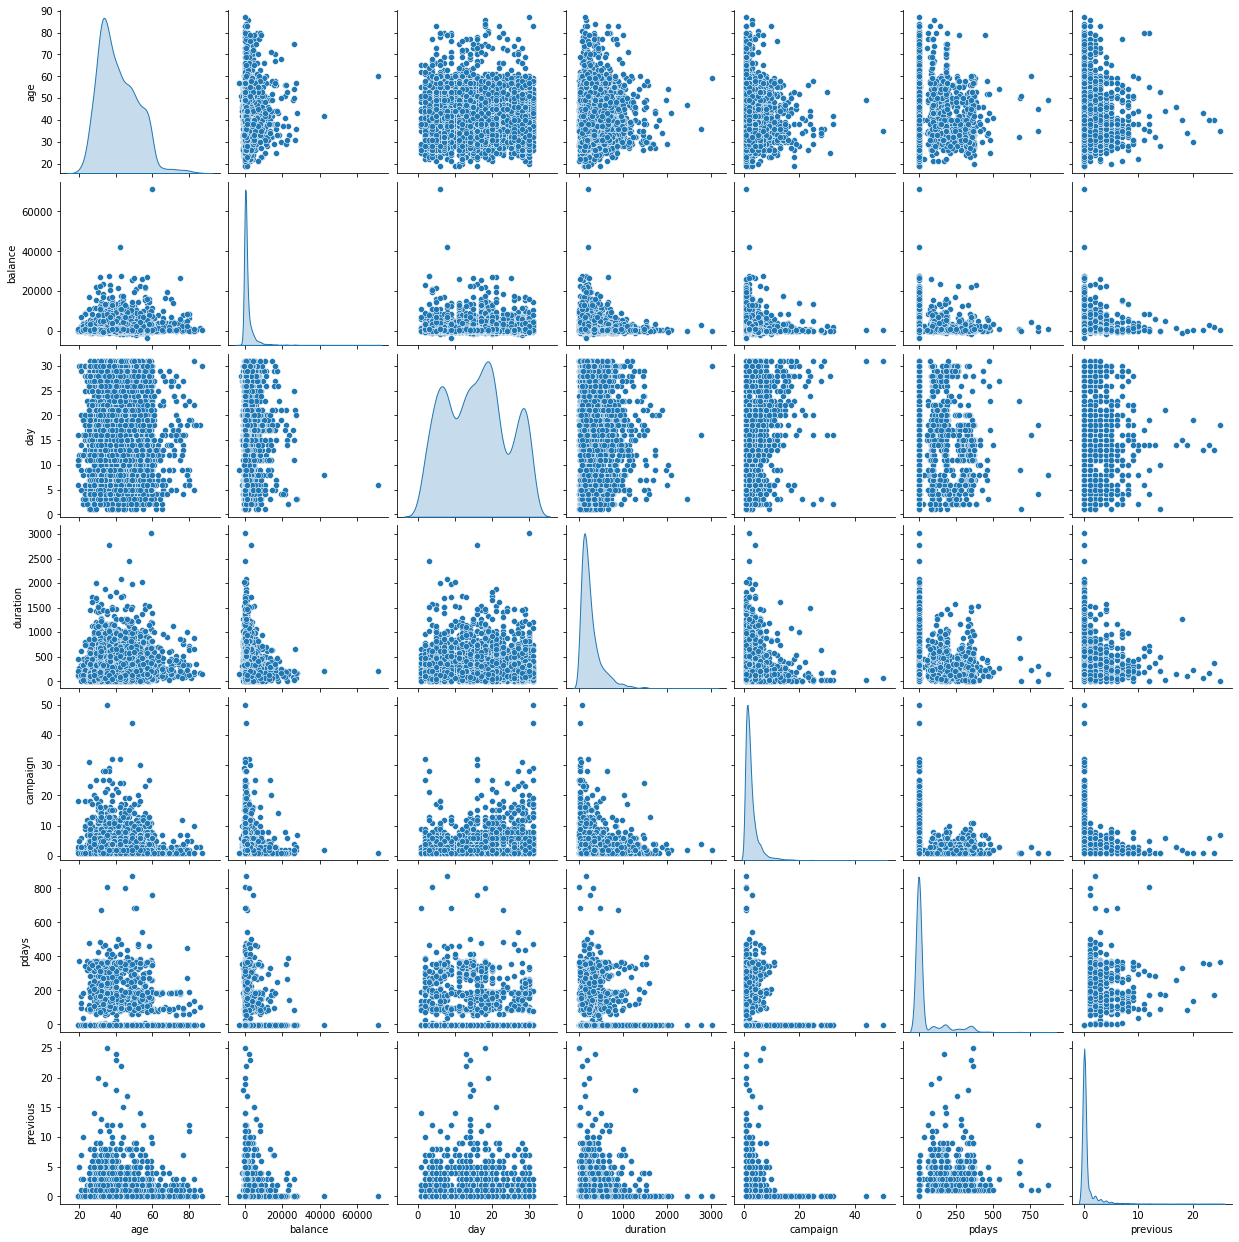

In [5]:
sn.pairplot(data=df, diag_kind='kde')

In [6]:
df.isna().any()     # Checking for any missing values in the data

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

In [7]:
df.isnull().sum()   # Checking for any null values in the data

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
df.dtypes       # Understanding type of values in the data

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

## Data Preprocessing

In [9]:
df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
2151,51,blue-collar,divorced,primary,no,602,yes,no,cellular,11,may,347,1,284,2,failure,no
2096,58,management,married,tertiary,no,9339,yes,no,telephone,18,nov,52,3,172,3,other,no
3633,36,technician,married,tertiary,no,629,yes,yes,cellular,29,dec,109,1,246,1,failure,no
3660,32,management,single,secondary,no,249,yes,no,unknown,2,jun,258,1,-1,0,unknown,no
4110,55,management,married,tertiary,no,236,no,no,cellular,4,aug,200,1,-1,0,unknown,no
1655,32,technician,single,secondary,no,493,no,no,cellular,13,aug,289,2,-1,0,unknown,no
681,31,technician,married,secondary,no,251,no,yes,cellular,29,aug,156,2,-1,0,unknown,no
1470,55,blue-collar,married,primary,no,4103,no,no,cellular,19,nov,291,1,-1,0,unknown,no
4049,40,services,married,secondary,no,9374,yes,no,cellular,21,nov,7,8,185,1,failure,no
1268,30,admin.,married,secondary,no,0,no,no,cellular,15,jul,127,5,-1,0,unknown,no


Removing the columns which have less effect on the outcome to maximize the accuracy of the model 

In [10]:
df = df.drop(['marital', 'housing','education', 'contact', 'day', 'month', 'poutcome'], axis=1)

In [11]:
df.sample(5)

,age,job,default,balance,loan,duration,campaign,pdays,previous,y
3557,57,retired,no,1180,yes,191,2,-1,0,no
475,57,blue-collar,no,452,no,139,4,-1,0,no
4425,35,services,no,505,yes,371,2,-1,0,no
1297,32,management,no,41,no,686,5,-1,0,yes
159,34,technician,no,1641,no,380,1,-1,0,no


In [12]:
df.replace(['yes','no'],[1.0,0],inplace=True)   # Replacing categories with numerical equivalent

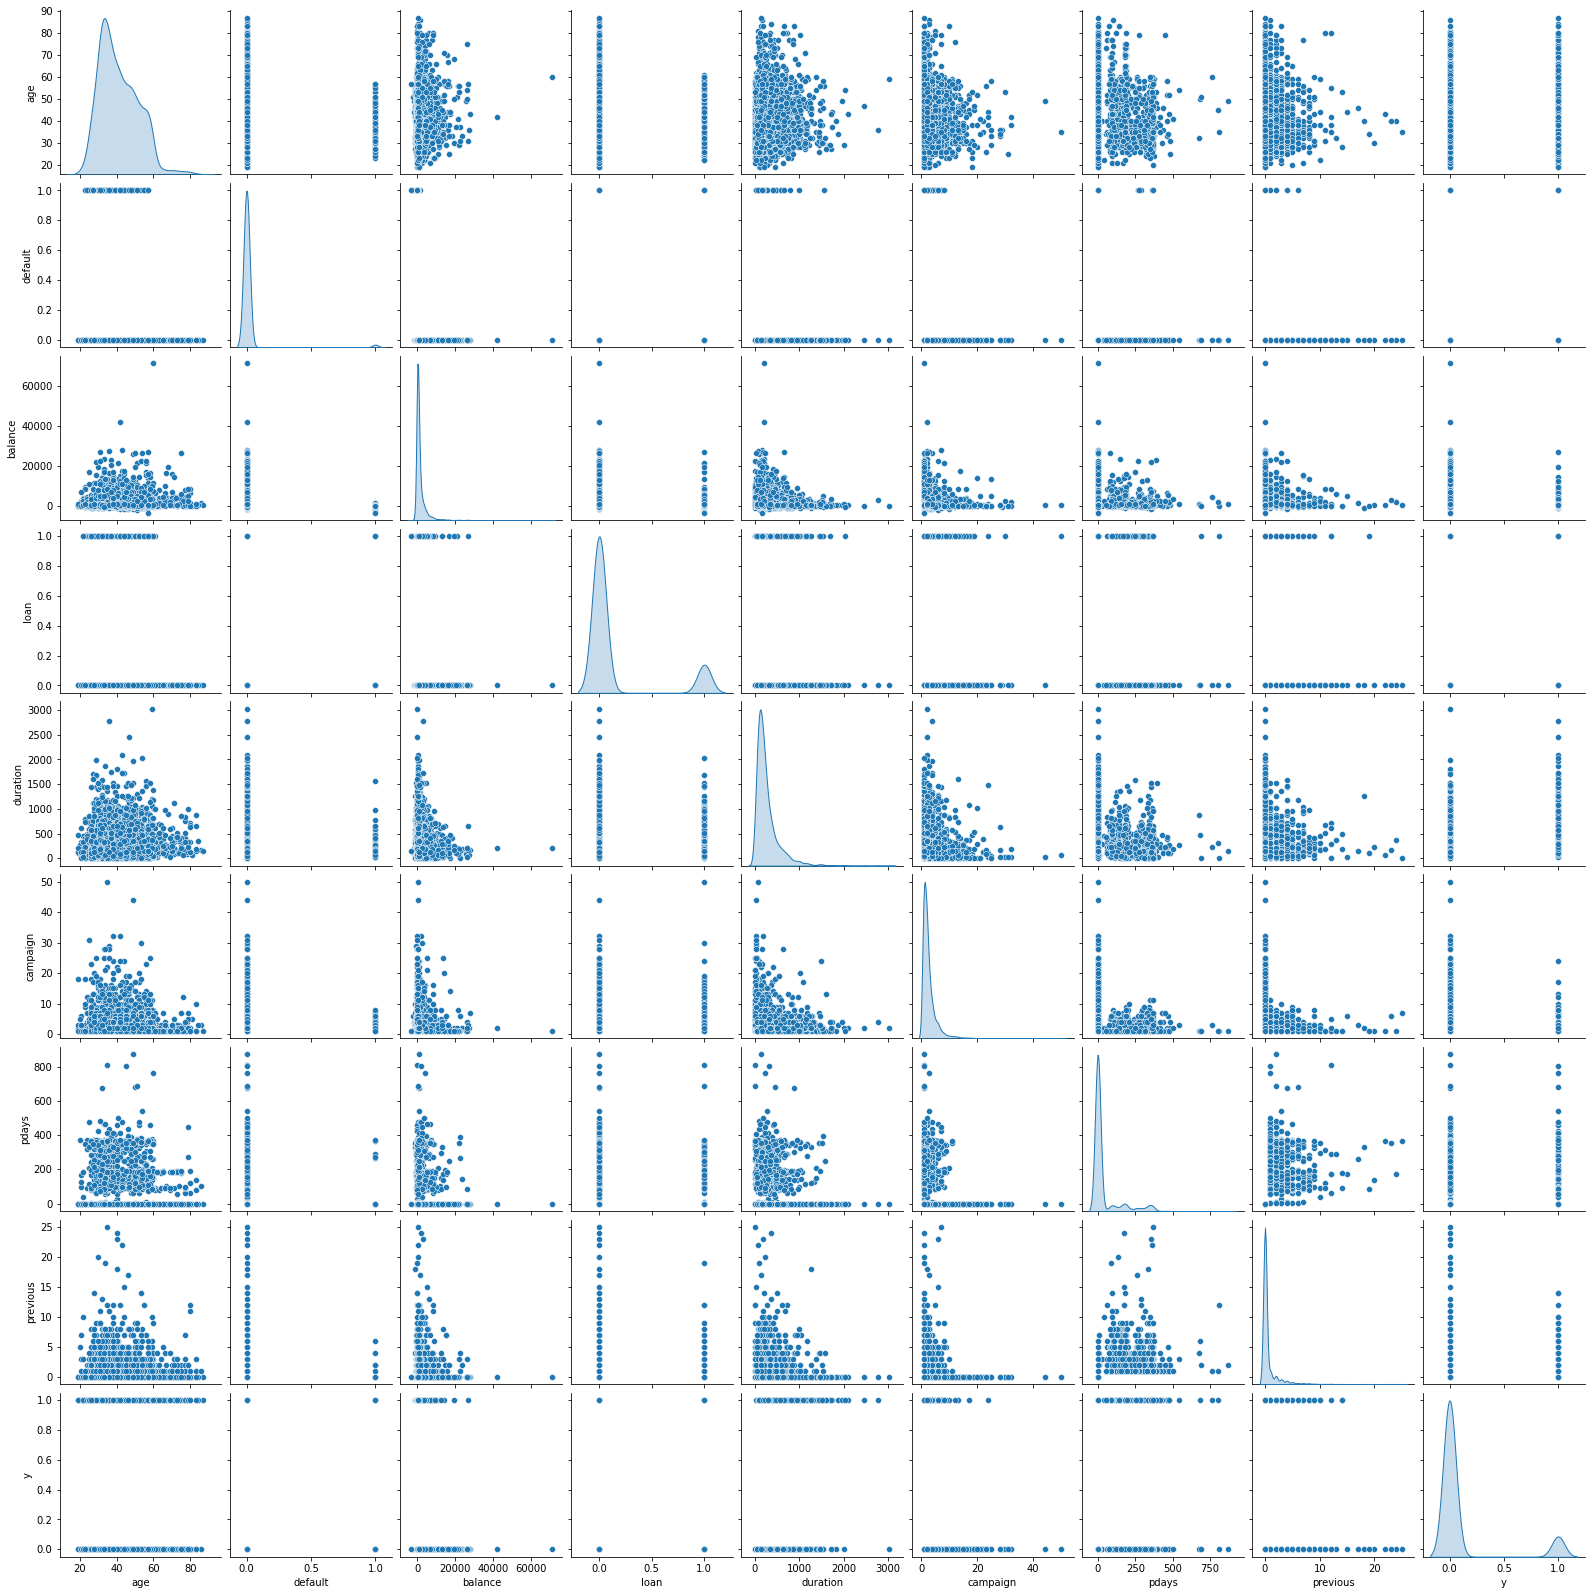

In [13]:
sn.pairplot(data=df, diag_kind='kde')

In [14]:
df.sample(5)

,age,job,default,balance,loan,duration,campaign,pdays,previous,y
737,36,technician,0.0,480,0.0,213,1,-1,0,1.0
4150,33,technician,0.0,8023,0.0,196,1,87,4,0.0
365,23,student,0.0,780,0.0,267,1,-1,0,0.0
1452,55,technician,0.0,955,0.0,104,1,-1,0,0.0
4256,34,housemaid,0.0,2929,0.0,518,2,-1,0,1.0


In [15]:
df.nunique(axis = 0)    # Return Series with number of distinct elements. Can ignore NaN values.

age           67
job           12
default        2
balance     2353
loan           2
duration     875
campaign      32
pdays        292
previous      24
y              2
dtype: int64

In [16]:
df.shape    # Get the number of rows and columns in the dataframe

(4521, 10)

> pandas.get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.

In [17]:
df = pd.get_dummies(df) # converting categorical data into dummy or indicator variables

In [18]:
df.sample(5)     

,age,default,balance,loan,duration,campaign,pdays,previous,y,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
266,29,0.0,872,0.0,230,1,-1,0,0.0,0,...,0,0,0,0,0,0,1,0,0,0
2550,41,0.0,251,1.0,85,3,-1,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
3174,36,0.0,168,0.0,52,1,-1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2160,60,0.0,3387,0.0,636,2,-1,0,0.0,0,...,0,0,1,0,0,0,0,0,0,0
4219,26,0.0,-759,0.0,191,1,-1,0,0.0,0,...,0,1,0,0,0,0,0,0,0,0


In [19]:
df.shape

(4521, 21)

<AxesSubplot:>

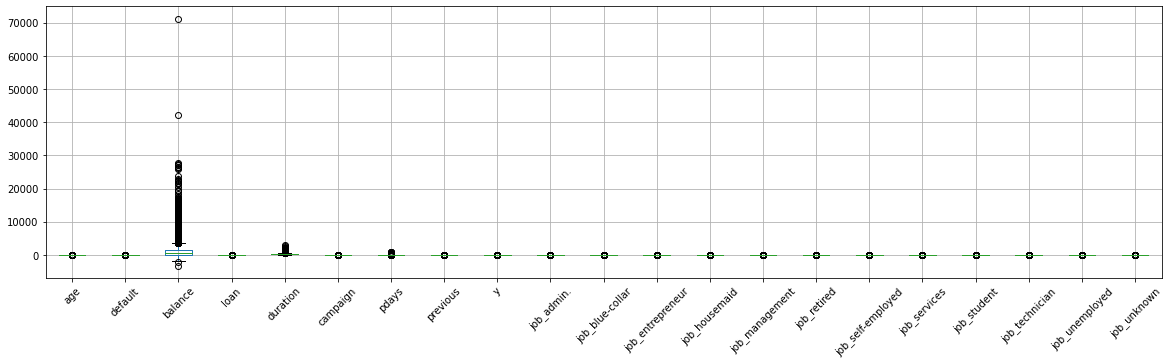

In [20]:
df.boxplot(rot=45, figsize=(20,5))      # Visualizing the data

In [21]:
df.skew()   # Checking for skewness before feature scaling

age                   0.699501
default               7.519405
balance               6.596431
loan                  1.930177
duration              2.772420
campaign              4.743914
pdays                 2.717071
previous              5.875259
y                     2.410736
job_admin.            2.565298
job_blue-collar       1.430050
job_entrepreneur      4.895427
job_housemaid         6.116887
job_management        1.392740
job_retired           4.089158
job_self-employed     4.664927
job_services          2.819328
job_student           7.132609
job_technician        1.758809
job_unemployed        5.689546
job_unknown          10.773076
dtype: float64

In [22]:
# def remove_outlier(dataframe):
#     dataframe = dataframe[np.abs(dataframe - dataframe.mean()) <= (3 * dataframe.std())]
#     return dataframe

In [24]:
# data = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))

In [25]:
from sklearn.model_selection import train_test_split

In [27]:
df.sample(2)

,age,default,balance,loan,duration,campaign,pdays,previous,y,job_admin.,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
3629,31,0.0,401,0.0,96,3,-1,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1951,46,0.0,1410,0.0,93,1,189,8,0.0,0,...,1,0,0,0,0,0,0,0,0,0


### Train/Test Split and Feature Scaling

In [28]:
y_values = df['y']  # taking out the y values from the dataset

In [29]:
data = df.drop('y', axis = 1)   # taking out the y values from the dataset

In [30]:
def feature_scaling(dataframe,column):
    """
    
    Args:
        dataframe (_type_): _description_
        column (_type_): _description_

    Returns:
        _type_: _description_
    """
    dataframe[column] = np.divide(np.subtract(dataframe[column],dataframe[column].mean()),
                                  dataframe[column].std())
    return dataframe[column]

In [31]:
column = list(data.columns)
for item in column:
    data[item] = feature_scaling(data,item)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data, y_values, test_size = 0.3)    # We are splitting the data into training and testing sets in 70:30 ratio

### Formula for Sigmoid function

In [33]:
def sigmoid(z):
    """
    Compute the sigmoid of z
    Args: z (ndarray): A scalar, numpy array of any size.
    Returns: g (ndarray): sigmoid(z), with the same shape as z
         
    """
    g = 1/(1+np.exp(-z))
    return g

In [34]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   
        
    return dj_db, dj_dw  

## Logistic Gradient Descent

The gradient descent algorithm utilizes the gradient calculation:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously 


In [35]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    w = copy.deepcopy(w_in) 
    b = b_in    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   
        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
    return w, b     

## Training

In [36]:
y_train1 = np.array(y_train)

In [37]:
X_train1 = np.array(X_train)

In [38]:
try:
    w_tmp  = np.zeros_like(X_train1[0])
    b_tmp  = 0.
    alph = 0.1
    iters = 2000
    w_out, b_out = gradient_descent(X_train1, y_train1, w_tmp, b_tmp, alph, iters) 
    print(f"\nupdated parameters: w:{w_out}, b:{b_out}")
except Exception as e:
    print(f"Error : {e}")


updated parameters: w:[ 0.01705865  0.01205443  0.04905395 -0.26166389  1.01129039 -0.21813777
  0.16702927  0.20861487  0.05592537 -0.28669504 -0.13755759 -0.02563187
  0.14914444  0.22475033  0.00359326 -0.05447392  0.14239953  0.04361845
 -0.05479067  0.08072939], b:-2.518809214004374


In [39]:
def predict(x, w, b): 
    """
    single predict using logistic regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b
    final = sigmoid(p)     
    return final  

## Testing

In [40]:
try:
    x_test = np.array(X_test)
    y_expected = np.array(y_test)
    y_test = np.array([predict(i, w_out, b_out) for i in x_test])       # calculating the predicted values
except Exception as e:
    print(f'Error : {e}')

In [41]:
y_expected[:10]     # Printing the actual values

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [42]:
y_test_1 = [1.0 if i>0.5 else 0.0 for i in list(y_test)]        # Putting the values in 0 or 1 labels

In [43]:
y_test_1 = np.array(y_test_1)
print(y_test_1)

[0. 0. 0. ... 0. 0. 0.]


In [44]:
# function to check the accuracy of the prediction
def accuracy_check(y_predicted, y_data):
        p, e = y_predicted, y_data
        n = len(y_predicted)
        return 1-sum([abs(p[i]-e[i])/e[i] for i in range(n) if e[i] != 0])/n

In [48]:
print(f'The accuracy is : {accuracy_check(y_expected, y_test_1)*100} %')

The accuracy is : 98.01031687546057 %
